In [1]:
from keras.layers import Input,Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

In [2]:
(x_train,_),(x_test,_) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt
n = 10 # 显示的记录数

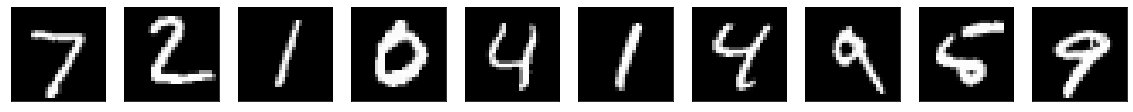

In [5]:
plt.figure(figsize=(20,4))
for i in range(n):
    # 显示原始图片
    ax = plt.subplot(2,n,i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False) # 不显示X轴
    ax.get_yaxis().set_visible(False) # 不显示Y轴
plt.show()

In [9]:
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D

In [10]:
# 编码过程
input_img = Input(shape=(28,28,1))
# Conv1
x = Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same')(input_img)
x = MaxPool2D(pool_size=(2,2),padding='same')(x)
# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 
# Conv 3 #
x = Conv2D(filters = 8, kernel_size=(3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

In [11]:
# 解码过程
# DeConv1
x = Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same')(encoded)
x = UpSampling2D((2,2))(x)
# DeConv2
x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(filters=1,kernel_size=(3,3),activation='sigmoid',padding='same')(x)

In [12]:
# 声明模型
autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [16]:
autoencoder

In [17]:
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))

In [18]:
# 训练模型
autoencoder.fit(x_train,x_train,epochs=100,batch_size=128,shuffle=True,validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 122us/step - loss: -521.5207 - val_loss: -532.2469
Epoch 2/100
60000/60000 [==============================] - 3s 44us/step - loss: -524.9879 - val_loss: -532.7459
Epoch 3/100
60000/60000 [==============================] - 3s 43us/step - loss: -525.3731 - val_loss: -532.5400
Epoch 4/100
60000/60000 [==============================] - 3s 43us/step - loss: -525.5823 - val_loss: -533.2330
Epoch 5/100
60000/60000 [==============================] - 3s 44us/step - loss: -525.7232 - val_loss: -533.3937
Epoch 6/100
60000/60000 [==============================] - 3s 43us/step - loss: -525.8281 - val_loss: -533.2781
Epoch 7/100
60000/60000 [==============================] - 3s 43us/step - loss: -525.9156 - val_loss: -533.1016
Epoch 8/100
60000/60000 [==============================] - 3s 45us/step - loss: -525.9816 - val_loss: -533.6389
Epoch 9/100
60000/60000 [============================

Epoch 73/100
60000/60000 [==============================] - 3s 44us/step - loss: -526.7978 - val_loss: -534.0702
Epoch 74/100
60000/60000 [==============================] - 3s 43us/step - loss: -526.7984 - val_loss: -534.2009
Epoch 75/100
60000/60000 [==============================] - 3s 42us/step - loss: -526.8023 - val_loss: -534.3305
Epoch 76/100
60000/60000 [==============================] - 3s 44us/step - loss: -526.8045 - val_loss: -534.3300
Epoch 77/100
60000/60000 [==============================] - 3s 44us/step - loss: -526.7994 - val_loss: -534.3618
Epoch 78/100
60000/60000 [==============================] - 3s 42us/step - loss: -526.8031 - val_loss: -534.2963
Epoch 79/100
60000/60000 [==============================] - 3s 43us/step - loss: -526.8086 - val_loss: -534.3186
Epoch 80/100
60000/60000 [==============================] - 3s 42us/step - loss: -526.8115 - val_loss: -534.3679
Epoch 81/100
60000/60000 [==============================] - 3s 43us/step - loss: -526.8089 - val

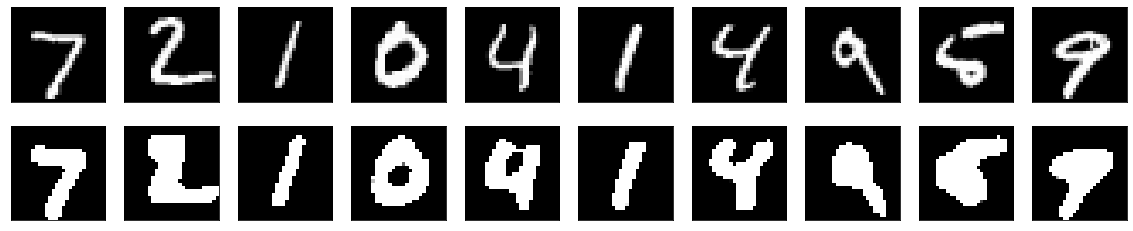

In [19]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # 显示原始图像
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 显示重构后的图像
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [20]:
# 如何构建图像降噪卷积自编码器
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

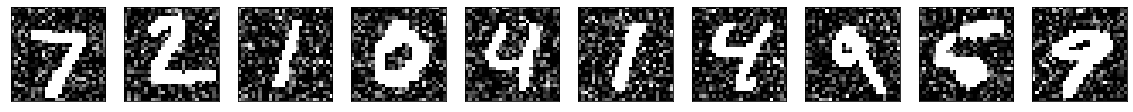

In [21]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test)
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 49us/step - loss: -523.1295 - val_loss: -533.0013
Epoch 2/100
60000/60000 [==============================] - 3s 48us/step - loss: -525.9010 - val_loss: -533.6476
Epoch 3/100
60000/60000 [==============================] - 3s 48us/step - loss: -526.1658 - val_loss: -533.8661
Epoch 4/100
60000/60000 [==============================] - 3s 47us/step - loss: -526.3178 - val_loss: -533.8334
Epoch 5/100
60000/60000 [==============================] - 3s 47us/step - loss: -526.4217 - val_loss: -534.0072
Epoch 6/100
60000/60000 [==============================] - 3s 48us/step - loss: -526.4881 - val_loss: -534.0776
Epoch 7/100
60000/60000 [==============================] - 3s 48us/step - loss: -526.5316 - val_loss: -534.1475
Epoch 8/100
60000/60000 [==============================] - 3s 48us/step - loss: -526.5703 - val_loss: -534.1679
Epoch 9/100
60000/60000 [=============================

60000/60000 [==============================] - 3s 46us/step - loss: -526.9080 - val_loss: -534.4089
Epoch 74/100
60000/60000 [==============================] - 3s 47us/step - loss: -526.9105 - val_loss: -534.4036
Epoch 75/100
60000/60000 [==============================] - 3s 46us/step - loss: -526.9112 - val_loss: -534.4161
Epoch 76/100
60000/60000 [==============================] - 3s 46us/step - loss: -526.9163 - val_loss: -534.4555
Epoch 77/100
60000/60000 [==============================] - 3s 46us/step - loss: -526.9128 - val_loss: -534.4172
Epoch 78/100
60000/60000 [==============================] - 3s 47us/step - loss: -526.9166 - val_loss: -534.4476
Epoch 79/100
60000/60000 [==============================] - 3s 46us/step - loss: -526.9182 - val_loss: -534.4211
Epoch 80/100
60000/60000 [==============================] - 3s 46us/step - loss: -526.9130 - val_loss: -534.4664
Epoch 81/100
60000/60000 [==============================] - 3s 46us/step - loss: -526.9156 - val_loss: -534.2

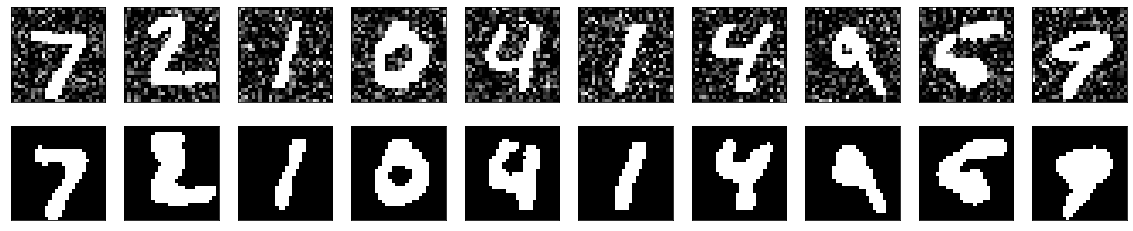

In [23]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # 显示原始图像
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 显示重构后的图像
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()